<a href="https://colab.research.google.com/github/sronak/Data_Science/blob/main/Day78_Long_Short_Term_Memory_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("spam.csv", delimiter=',', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)

In [5]:
data.isna().sum()

v1    0
v2    0
dtype: int64

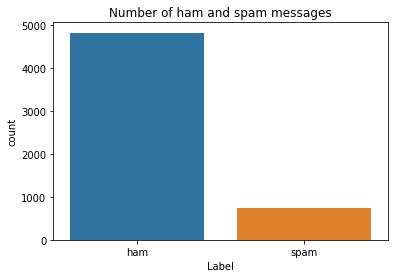

In [6]:
sns.countplot(data=data, x="v1")
plt.xlabel('Label')
plt.title("Number of ham and spam messages")
plt.show()

In [7]:
x = data.v2
y = data.v1

In [8]:
le = LabelEncoder()
y=le.fit_transform(y)
y = y.reshape(-1,1)

In [9]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
import tensorflow.keras as keras

In [12]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

In [13]:
def RNN():
  inputs = Input(name='inputs', shape=[max_len])
  layer = Embedding(max_words, 50, input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Activation('relu', name='relu')(layer) # comma added here
  layer = Dropout(0.5)(layer)
  layer = Dense(1, name='our_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  return model

In [14]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 relu (Activation)           (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 our_layer (Dense)           (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0     

In [15]:
model.fit(sequences_matrix,y_train,batch_size=32,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/20
112/112 [==============================] - 14s 113ms/step - loss: 0.3080 - accuracy: 0.8976 - val_loss: 0.1698 - val_accuracy: 0.9552
Epoch 2/20
112/112 [==============================] - 12s 106ms/step - loss: 0.1036 - accuracy: 0.9759 - val_loss: 0.0737 - val_accuracy: 0.9765


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [17]:
accr = model.evaluate(test_sequences_matrix, y_test)

35/35 [==============================] - 1s 19ms/step - loss: 0.0671 - accuracy: 0.9830


In [18]:
print("Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}".format(accr[0],accr[1]))

Test set
 Loss: 0.067
 Accuracy: 0.983
